In [28]:
import os, sys
import multiprocessing as mp
import numpy as np
import osmnx as ox
from shapely.geometry import shape
import pandas as pd
import json
import matplotlib.pyplot as plt
from IPython.display import display #, IFrame
import folium
from pyproj import CRS
from PIL import Image
import selenium

def load_src(name, fpath):
    import os, imp
    p = fpath if os.path.isabs(fpath) \
        else os.path.join(os.path.dirname(os.path.abspath('')), fpath)
    return imp.load_source(name, p)
load_src("utils", "utils.py")
import utils

%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.2'

In [22]:
place = 'Porto'

In [23]:
# json_file = open("../../data/porto_boundary.geojson")
train1000 = pd.read_csv('../../data/train-1000.csv')
graphml_file = '../../data/porto.graphml'

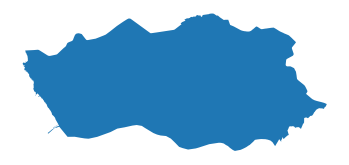

In [16]:
city = ox.geocode_to_gdf(place)
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

In [24]:
# map_data = json.load(json_file)
# boundary_polygon = shape(map_data["geometries"][0])
# G = ox.graph_from_polygon(boundary_polygon, network_type='drive')

KeyboardInterrupt: 

In [25]:
G = ox.io.load_graphml(graphml_file)

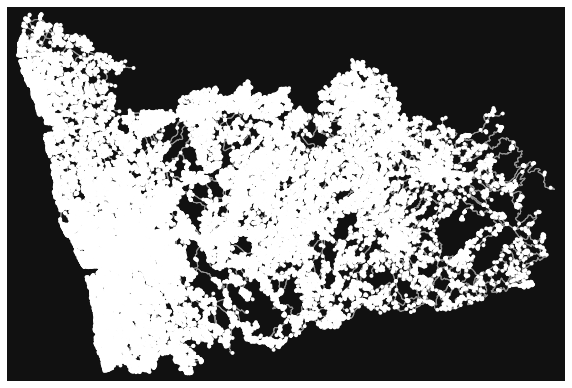

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [26]:
ox.plot_graph(G, figsize=(10, 10))

In [19]:
def plot_GPS_point_from_trajectory(t_number, color, G, savepath=None, lines=False, show=True):
    if not 0 < t_number < 1001:
        raise ValueError('the t_number must in [1, 1000]')
    t_number -= 1

    fig, ax = ox.plot_graph(G, node_size=3, figsize=(20, 20), edge_linewidth=1.5, show=False)

    gps_points = eval(train1000['POLYLINE'][t_number])
    x, y = zip(*gps_points)
    x_max, x_min, x_gap, x_mid = max(x), min(x), max(x) - min(x), (max(x) + min(x))/2
    y_max, y_min, y_gap, y_mid = max(y), min(y), max(y) - min(y), (max(y) + min(y))/2
    gap = max(x_gap, y_gap) * 0.6
    ax.set_xlim(x_mid - gap, x_mid + gap)
    ax.set_ylim(y_mid - gap, y_mid + gap)

    if lines:
        ax.plot(x, y, linewidth = 4, color=color, linestyle='-', marker='x', markersize=20)
    else:
        ax.scatter(x, y, c=color, marker='x',s=20)

    if savepath:
        fig.savefig(savepath, dpi=80)
        print(f'GPS picture {t_number+1} saving finished.')

    if show:
        plt.show()


GPS picture 1 saving finished.


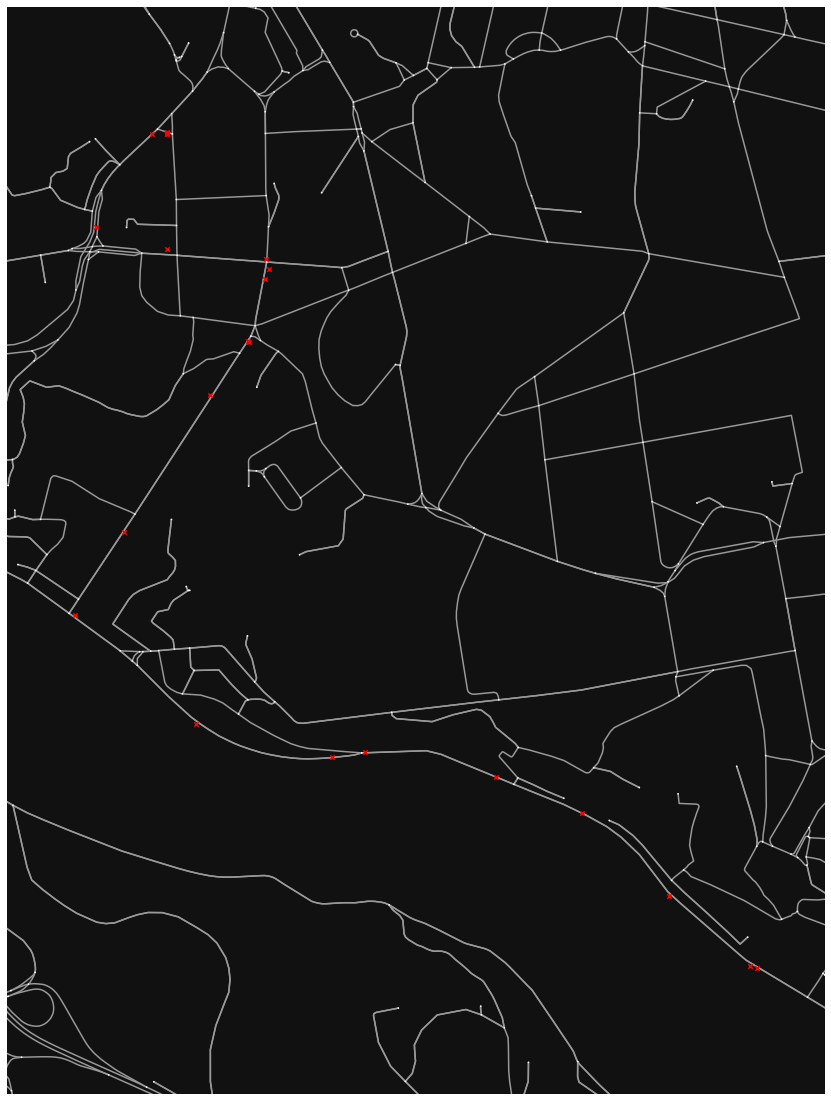

GPS picture 2 saving finished.


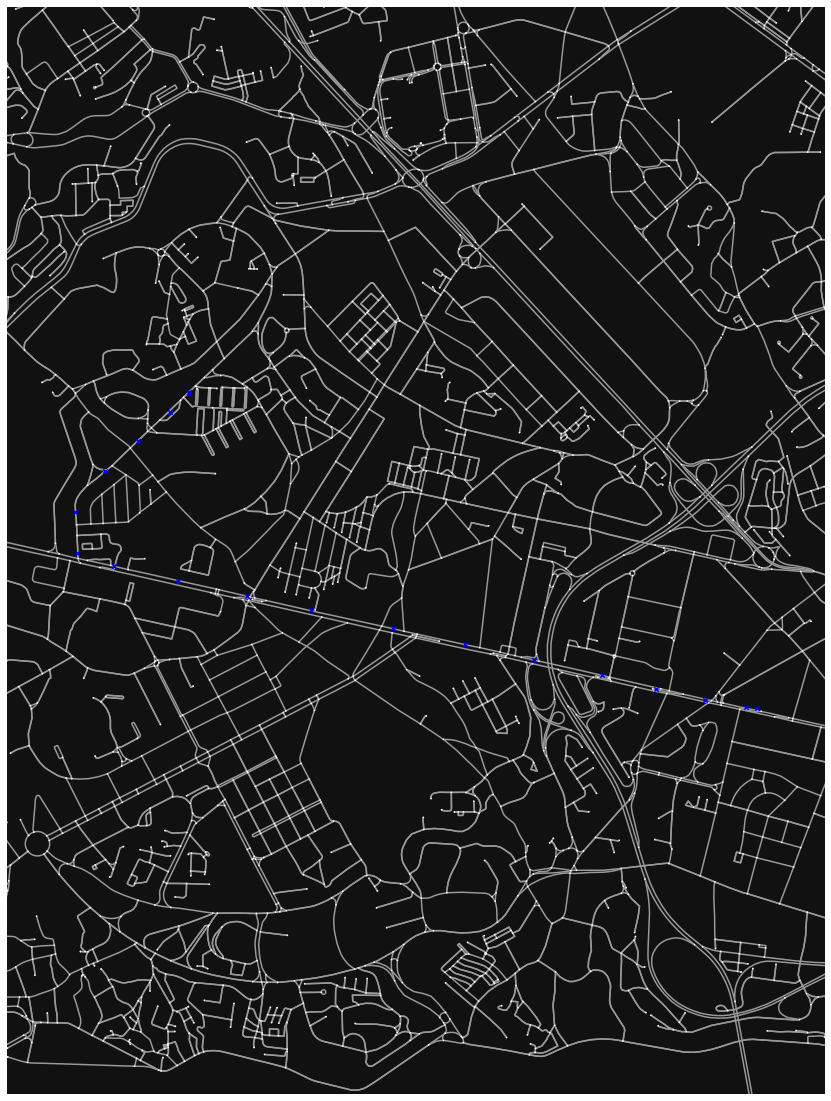

GPS picture 3 saving finished.


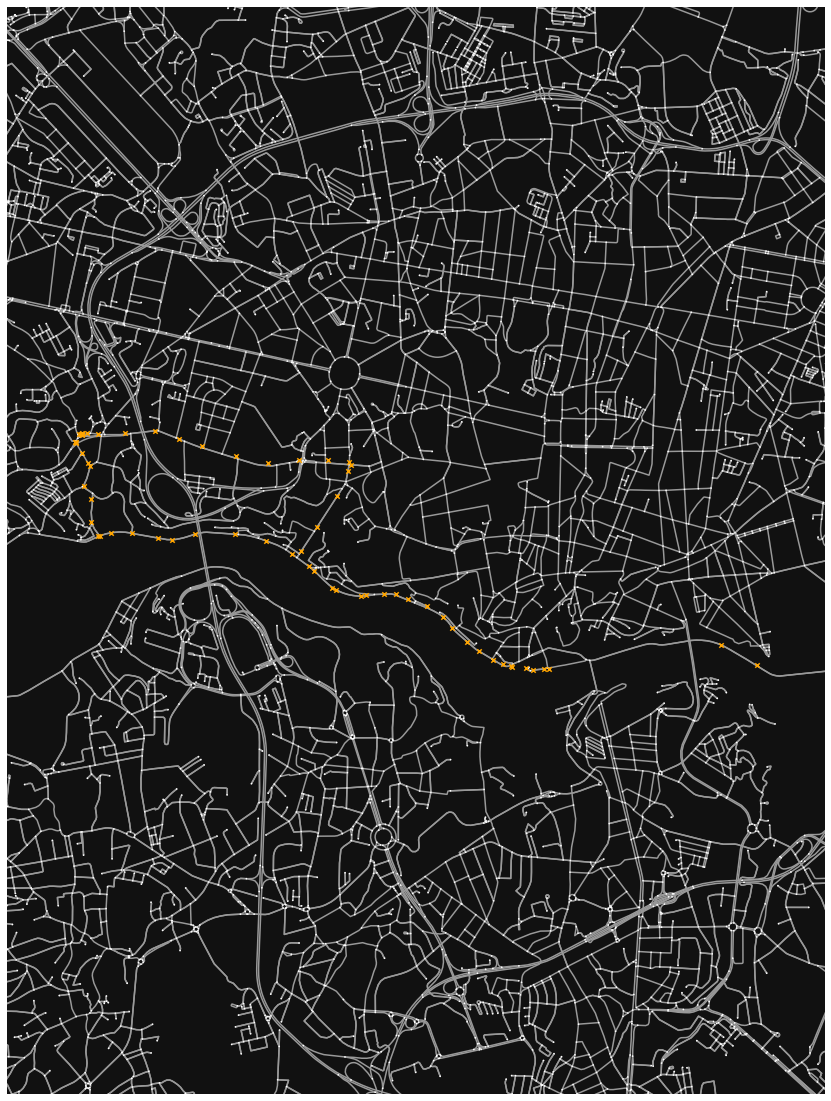

GPS picture 4 saving finished.


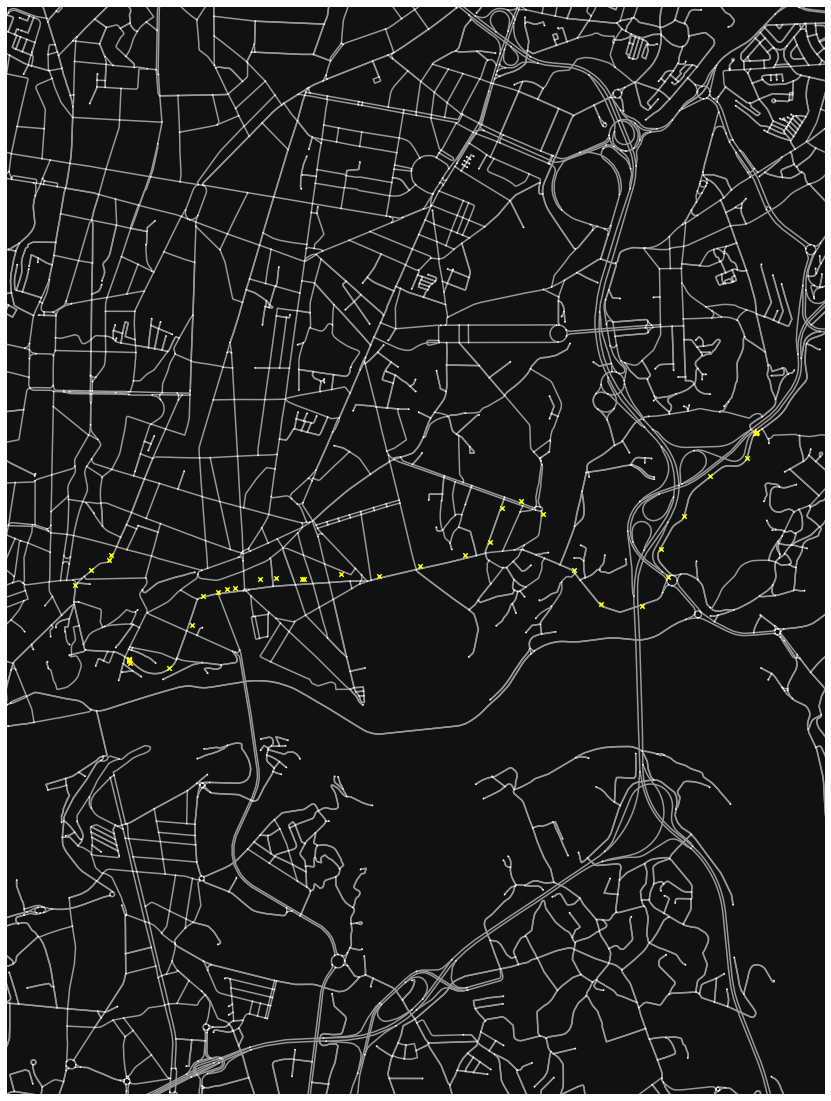

GPS picture 5 saving finished.


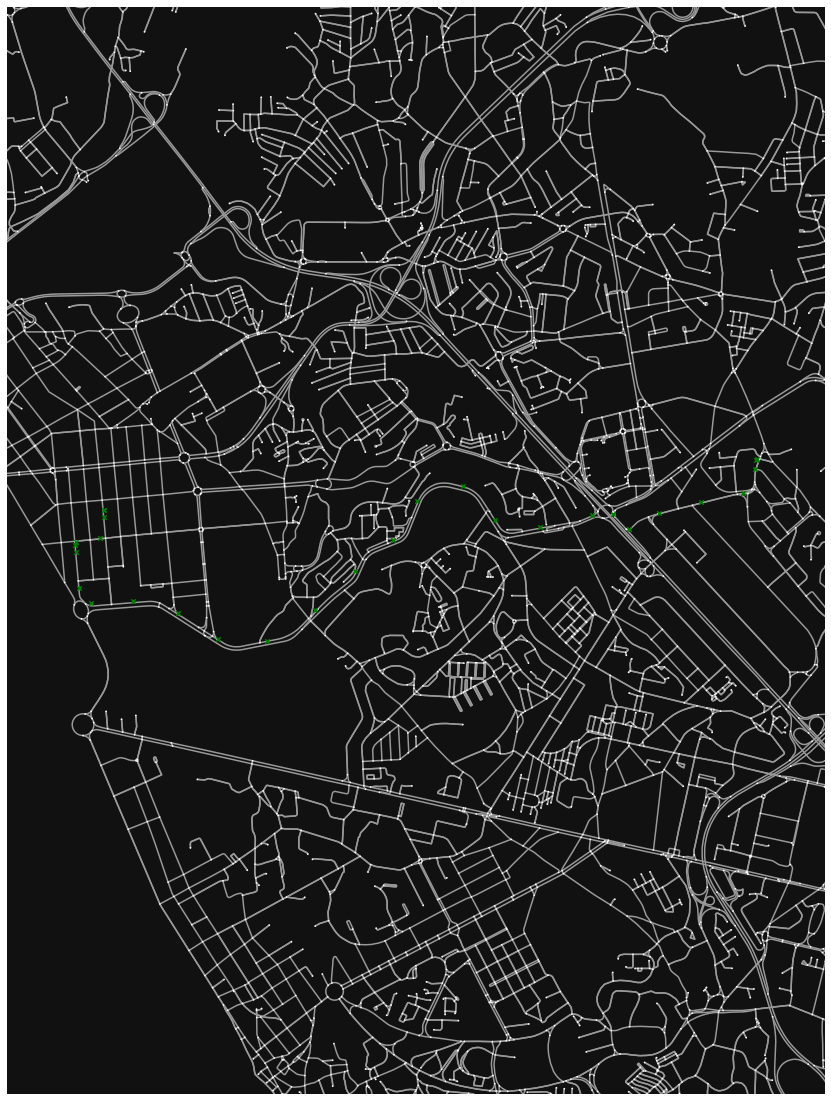

GPS picture 6 saving finished.


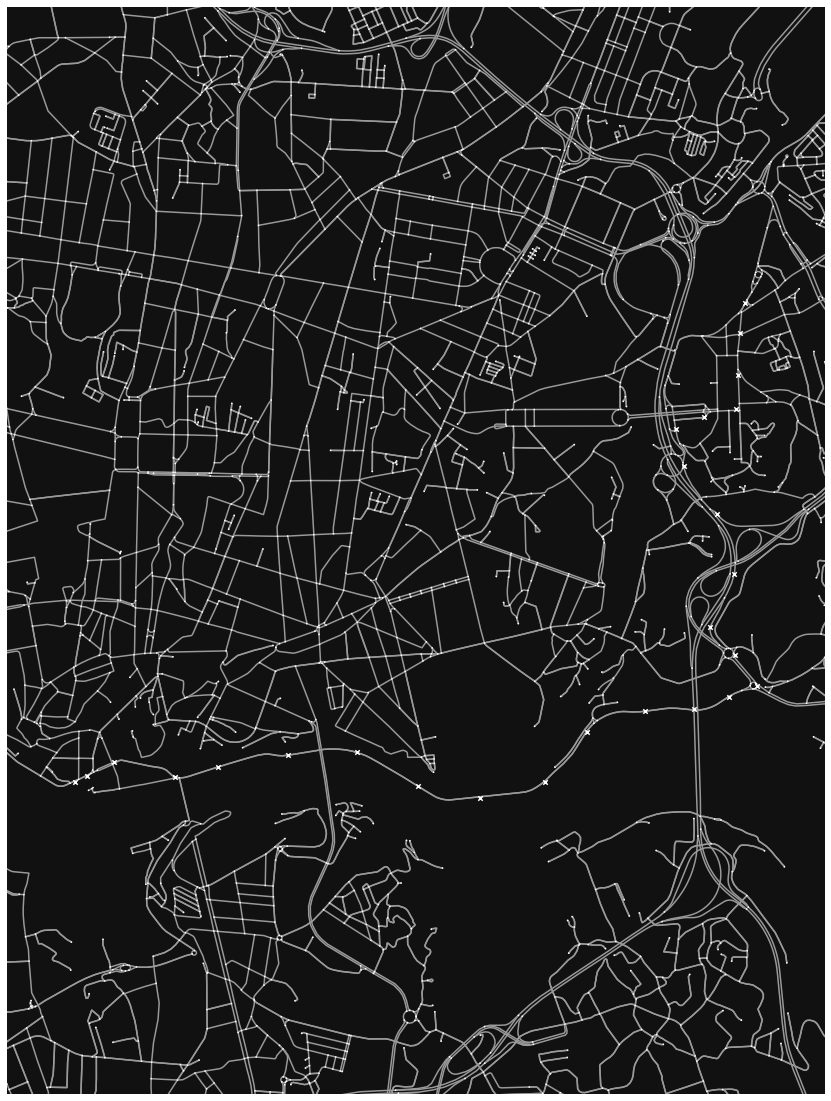

GPS picture 7 saving finished.


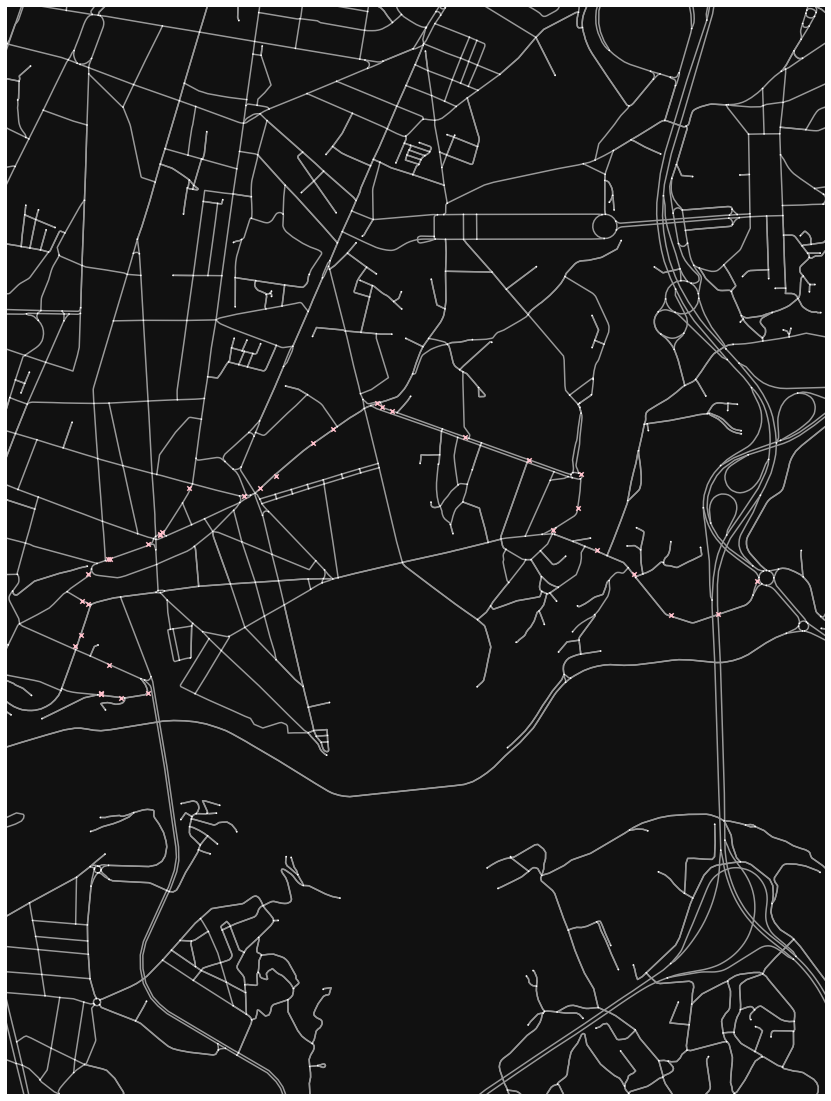

GPS picture 8 saving finished.


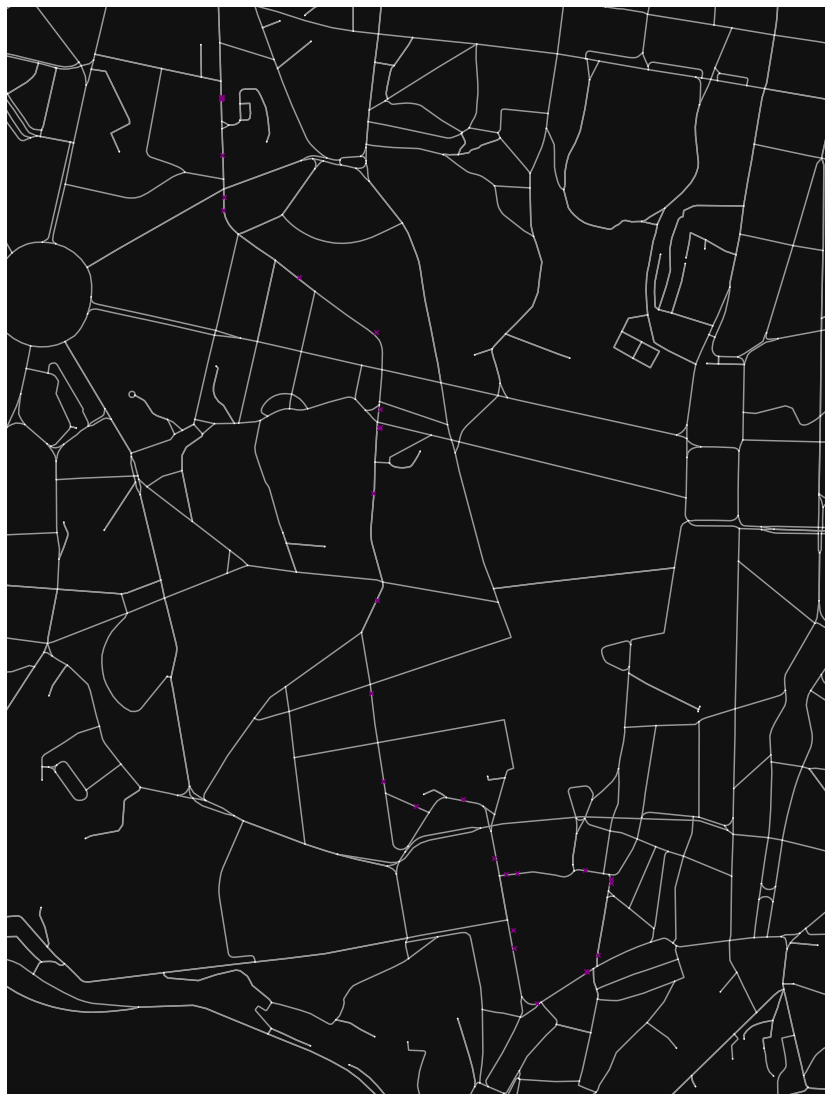

GPS picture 9 saving finished.


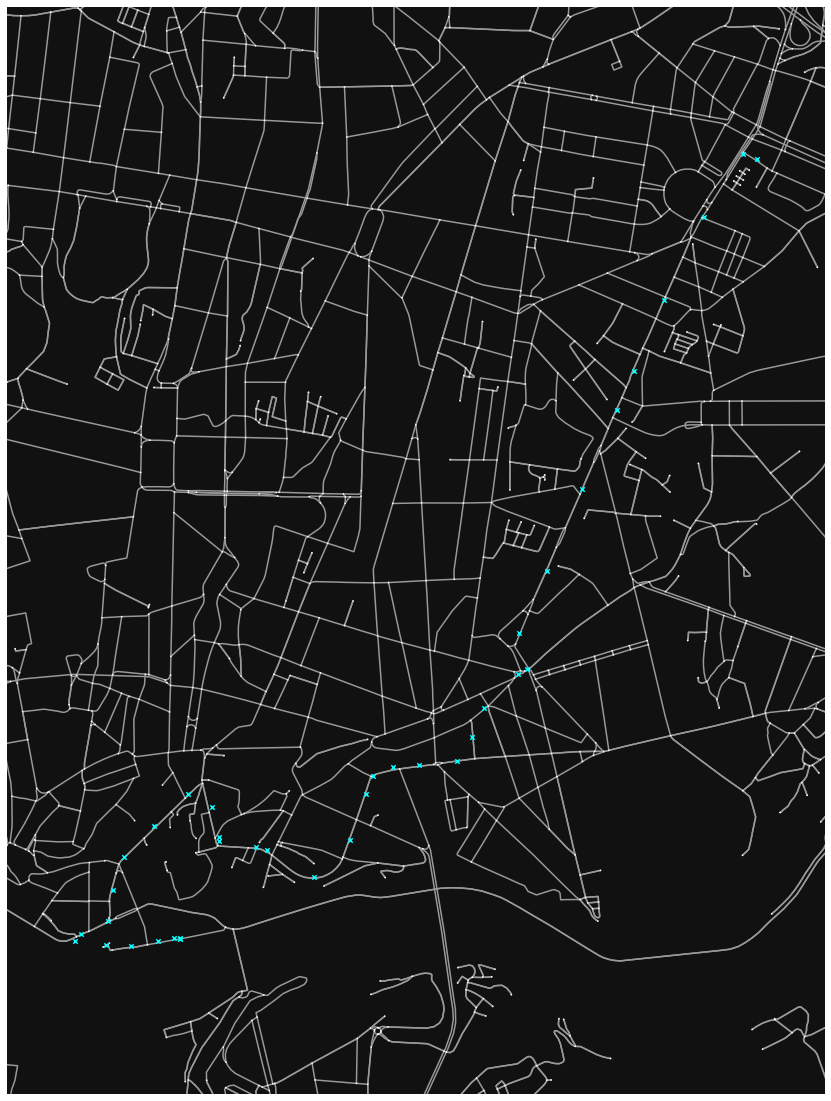

GPS picture 10 saving finished.


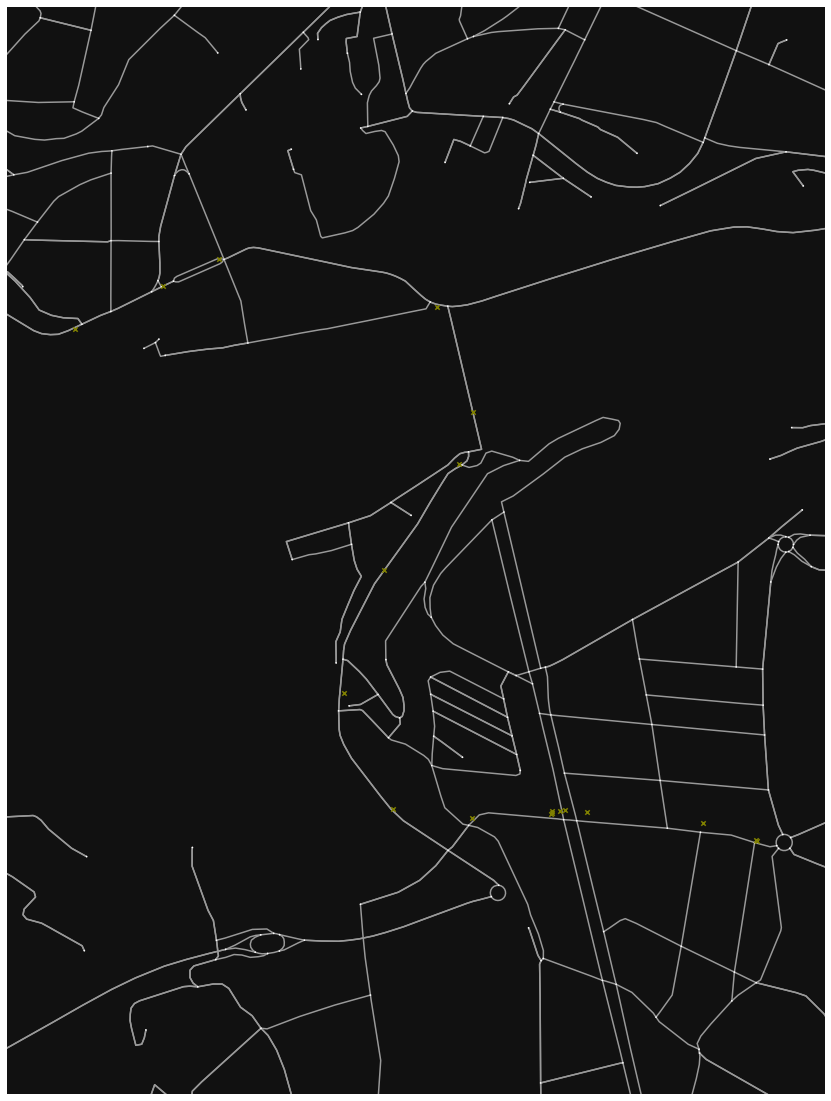

In [27]:
LINES = False
for t_number, color in enumerate(('red', 'blue', 'orange', 'yellow', 'green', 'white', 'pink', 'purple', 'cyan', 'olive')):
    plot_GPS_point_from_trajectory(t_number+1, color=color, G=G, savepath=f'../../results/task2/GPS{t_number+1}.png', lines=LINES)